In [5]:
# Importing the necessary libraries
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inlineimport random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

Populating the interactive namespace from numpy and matplotlib


UsageError: Line magic function `%` not found.


In [3]:
#Defining a method to plot the clusters
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

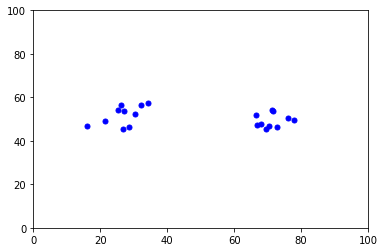

In [6]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

In [10]:
# Compute distance between each pair of the two collections of inputs i.e., calculate distance between all the points in data
from scipy.spatial.distance import cdist
ds = cdist(data,data) 
ds #Find out distance between each pair of datapoint and it is again matrix where data is in x axis as well as data in y axis

array([[ 0.        ,  4.59917899, 11.26613929,  3.56969494,  1.43080282,
         6.17514114,  3.05547161,  8.38031301,  8.2410771 ,  9.84784743,
        35.78595992, 50.74911873, 39.98479486, 33.97837645, 41.66998137,
        36.68503322, 45.39779589, 42.05811637, 38.28180395, 40.15433107],
       [ 4.59917899,  0.        , 11.34332131,  6.18273535,  4.02799508,
         8.32619918,  6.78599284,  5.29399433,  5.33188261,  9.39359452,
        34.7454637 , 50.8259977 , 40.31493648, 32.76672595, 40.73618923,
        36.17352332, 45.30132921, 41.4046859 , 38.50211541, 39.50501049],
       [11.26613929, 11.34332131,  0.        ,  7.95836281,  9.94573097,
         5.92778476,  9.33189082,  7.90126946,  7.58717371,  2.10585185,
        46.07485753, 61.79870943, 51.11831453, 44.10804649, 52.05665462,
        47.38806487, 56.35961778, 52.66874263, 49.37340175, 50.76566573],
       [ 3.56969494,  6.18273535,  7.95836281,  0.        ,  2.63004003,
         2.61415586,  1.57444731,  7.46153169,  

In [11]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")  #Linkage is again find out nearest point pairs which need to assign
lm[:5]     #it means 0 and 4 is connected with distance of 7.2567  and hight is 2 based on relative distance with each other

<ipython-input-11-f5851897dd97>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,"single")  #Linkage is again find out


array([[ 7.        ,  8.        ,  0.99654781,  2.        ],
       [ 3.        ,  6.        ,  4.5695348 ,  2.        ],
       [ 0.        ,  4.        ,  5.0279135 ,  2.        ],
       [14.        , 17.        ,  6.58136802,  2.        ],
       [12.        , 18.        ,  7.25672369,  2.        ]])

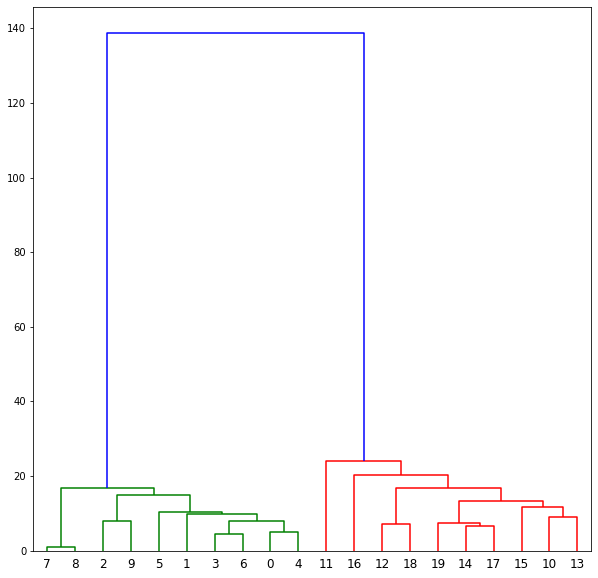

In [12]:
_=dendrogram(lm)   #linkage is argument to generate dendrogram into python

In [14]:
#labling to all datapoint are given as below
fcluster(lm,2,criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

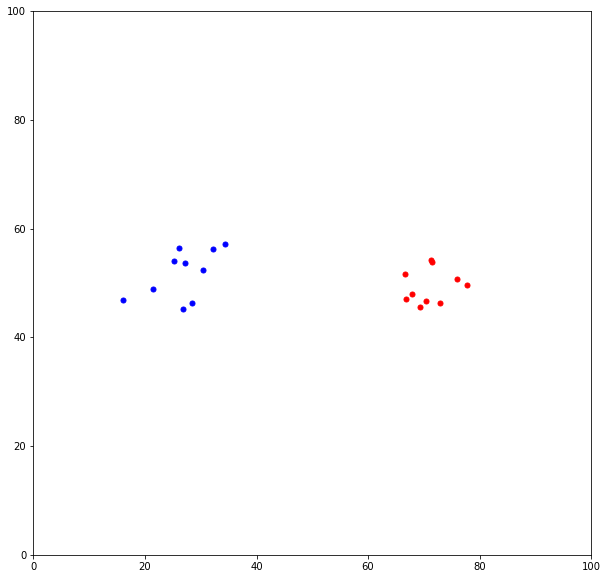

In [13]:
## Plotting the individual clusters
plotclusters(data,fcluster(lm,2,criterion='maxclust'))  #fcluster take argument such as linkage , no of cluster

**Linkage Methods**

In [36]:
# Taking a data for example
data = r_[dot(randn(10,2),diag([4,10]))+array([60,60]),
           dot(randn(10,2),diag([4,10]))+array([40,40])]
shuffle(data)

In [20]:
data

array([[57.35887965, 50.65569029],
       [58.71336523, 58.25518148],
       [55.33298996, 63.11819239],
       [70.91329335, 38.8358984 ],
       [37.66796872, 20.96787256],
       [39.72905389, 39.77640435],
       [54.56093839, 64.26855827],
       [40.22183517, 46.93486918],
       [38.2737622 , 48.25281897],
       [40.83592001, 27.57722515],
       [40.77328814, 32.29206697],
       [39.03119869, 39.43866296],
       [42.98792823, 41.38228652],
       [43.12946619, 47.60712318],
       [36.16050614, 49.83574357],
       [39.03287295, 49.17359771],
       [34.50940796, 42.40526548],
       [42.76054221, 31.23275753],
       [56.50242954, 61.65277951],
       [48.13126284, 38.60567662],
       [40.41588413, 40.60589201],
       [60.3134444 , 54.39588382],
       [57.4474706 , 70.11157663],
       [55.86323156, 60.225112  ],
       [64.20930031, 75.73890107],
       [42.03663801, 34.97505966],
       [68.62941081, 54.39973556],
       [37.58161158, 37.8533733 ],
       [60.08006605,

Initially, hierarchical clustering starts out with clusters consisting of individual points. 

Later, it compares clusters with each other and merges the two "closest" clusters.

Since clusters are sets of points, there are many different kinds of linkage methods:

- Single Linkage: cluster distance = smallest pairwise distance
- Complete Linkage: cluster distance = largest pairwise distance
- Average Linkage: cluster distance = average pairwise distance
- Centroid Linkage: cluster distance=  distance between the centroids of the clusters
- Ward’s Linkage: cluster criteria= Minimize the variance in the cluster


**Single Linkage:**
    
Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with an unusual structure


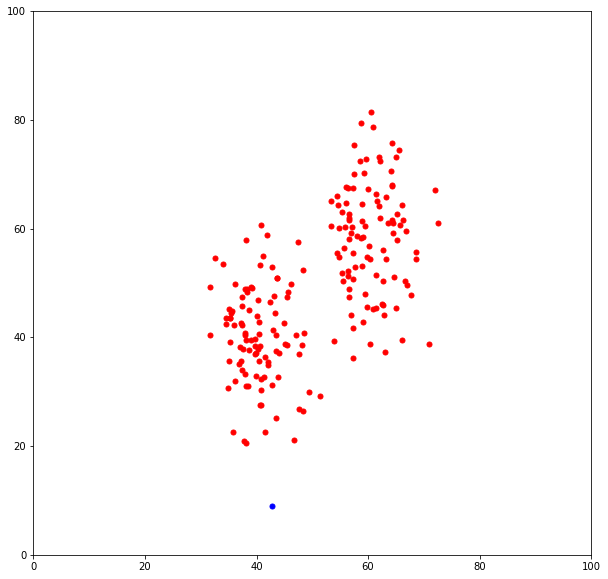

In [22]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

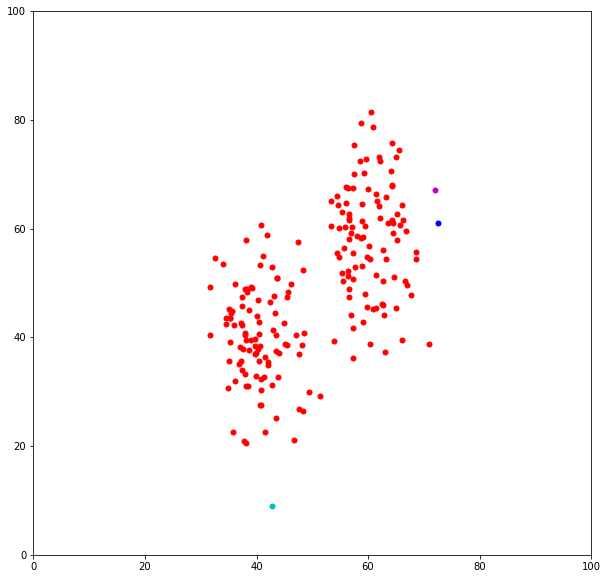

In [23]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

**Complete Linkage:** 
    
Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage


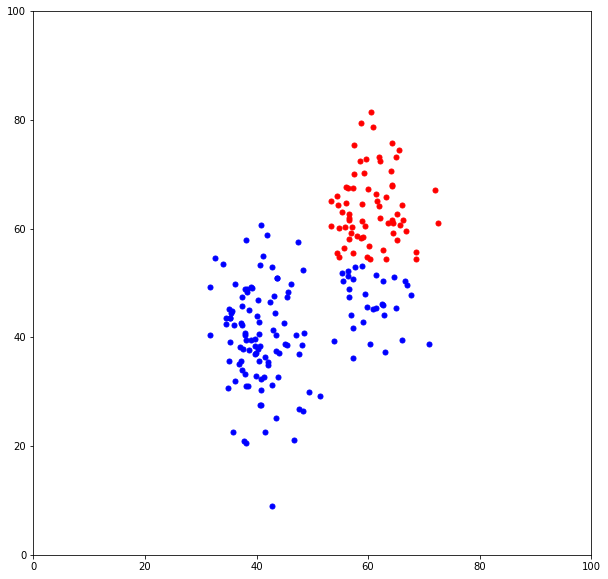

In [24]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

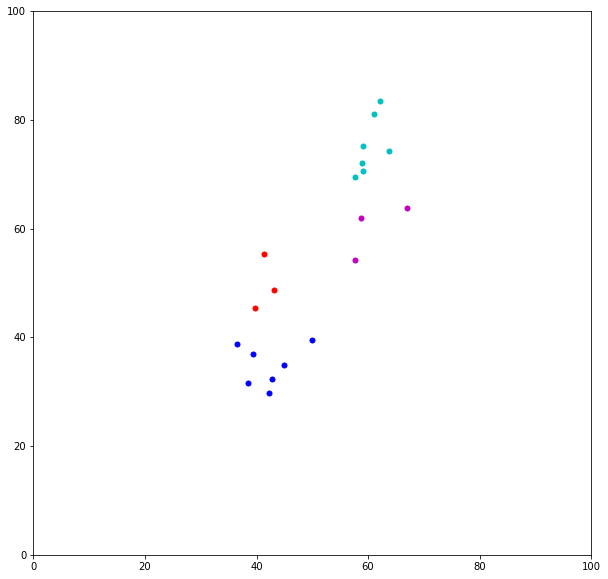

In [37]:
lm = linkage(data,metric='euclidean',method='complete')
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

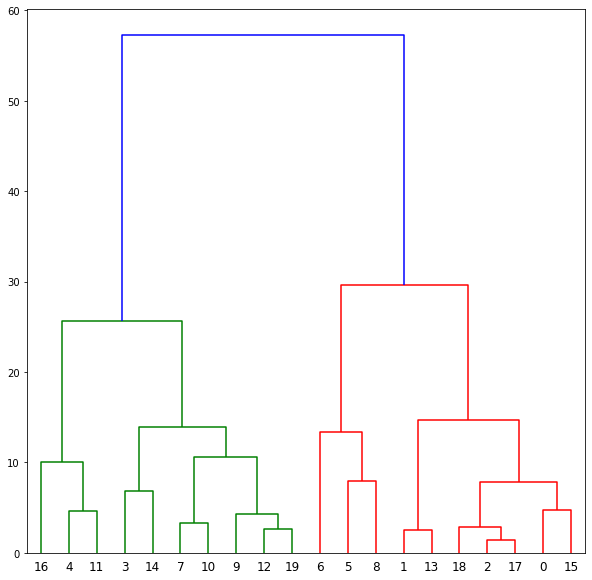

In [38]:
_=dendrogram(lm)   #linkage is argument to generate dendrogram into python

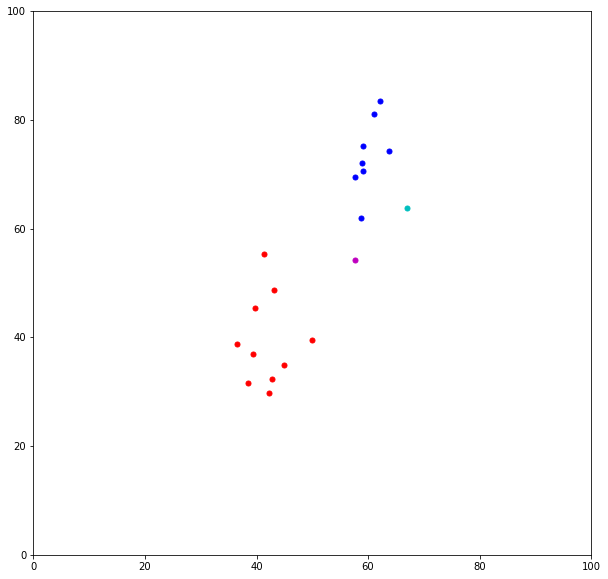

In [39]:
lm = linkage(data,metric='euclidean',method='single')
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

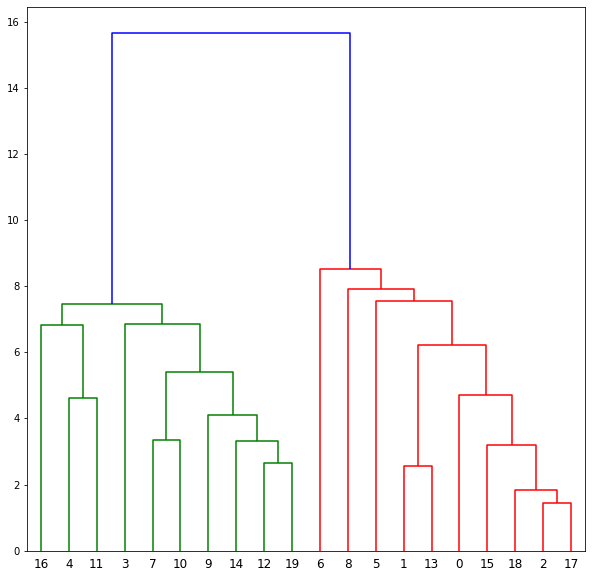

In [40]:
_=dendrogram(lm)   #linkage is argument to generate dendrogram into python

**Average Linkage:** 
Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.


- cluster distance is the average distance of all pairs of points in clusters 1 and 2


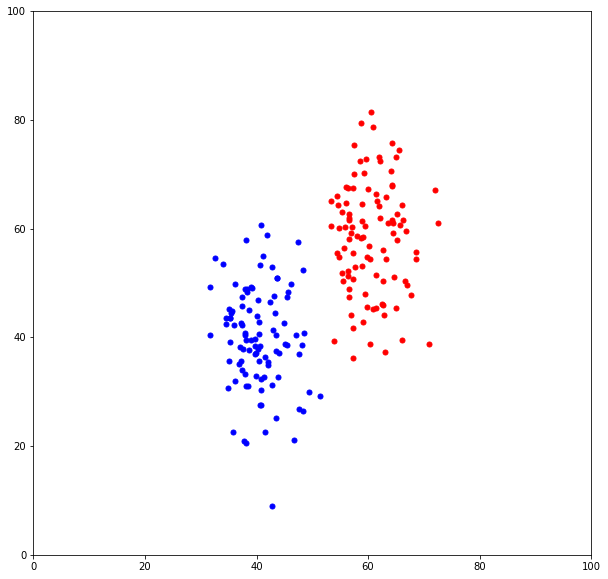

In [26]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

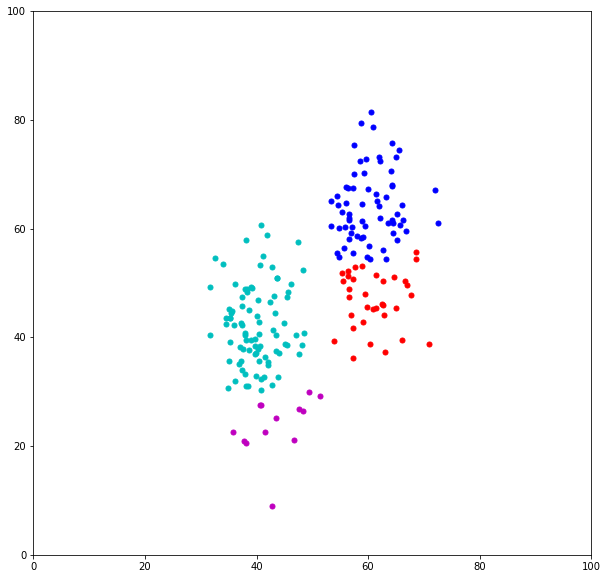

In [27]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

**Centroid Linkage:** 
The dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.

- cluster distance is the distance of the centroids of both clusters


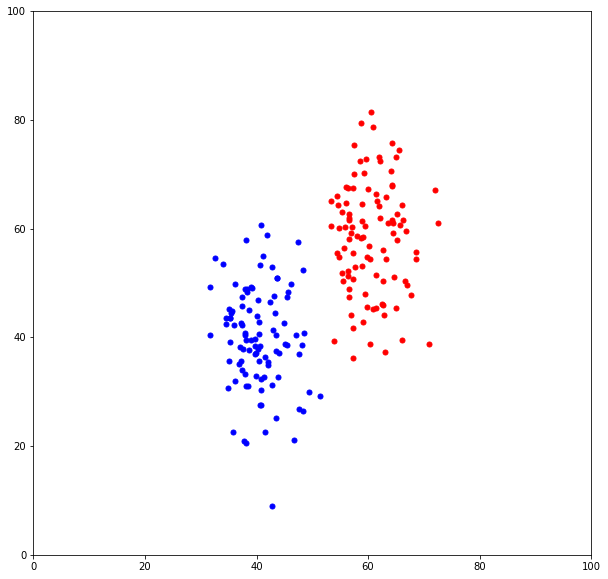

In [28]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

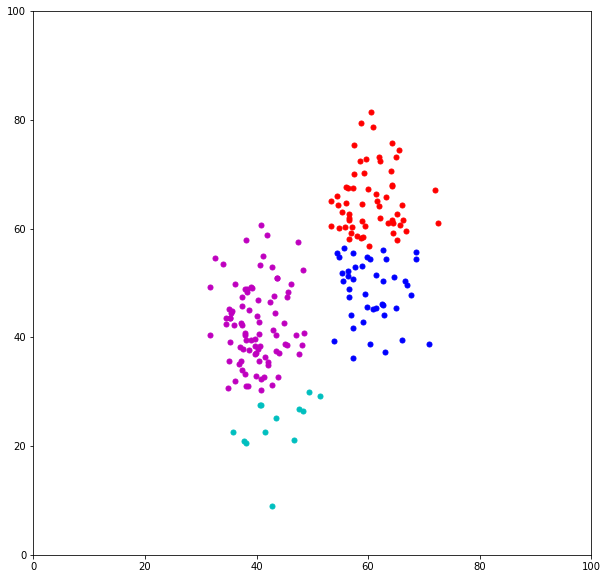

In [30]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

**Ward linkage:** 
    
Wikipidea says _Ward's minimum variance criterion minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging._

- based on minimizing a variance criterion before and after merging


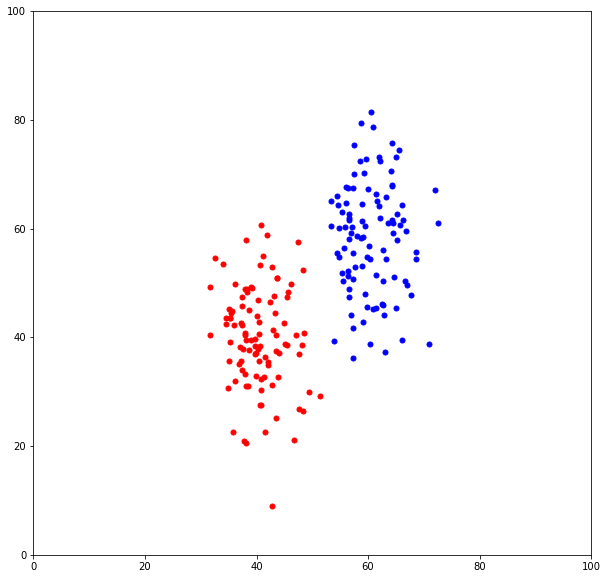

In [31]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

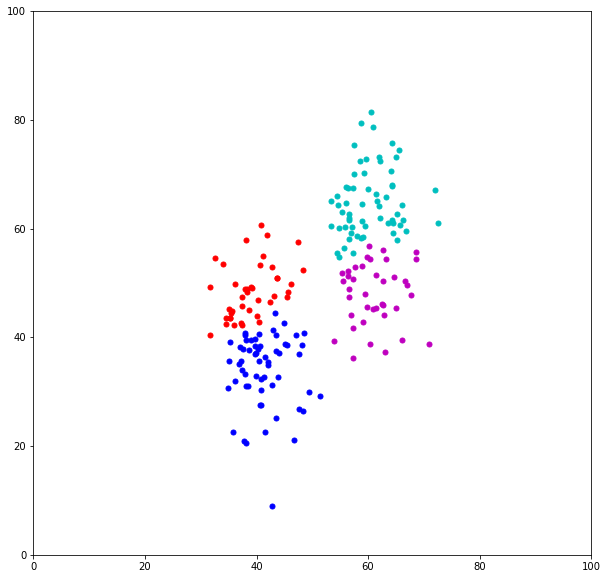

In [32]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)